   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Unique values in 'step': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 

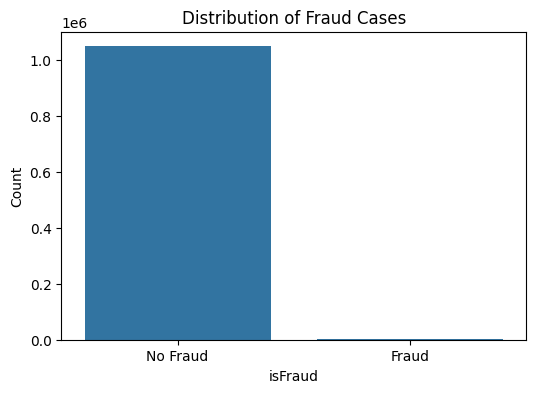

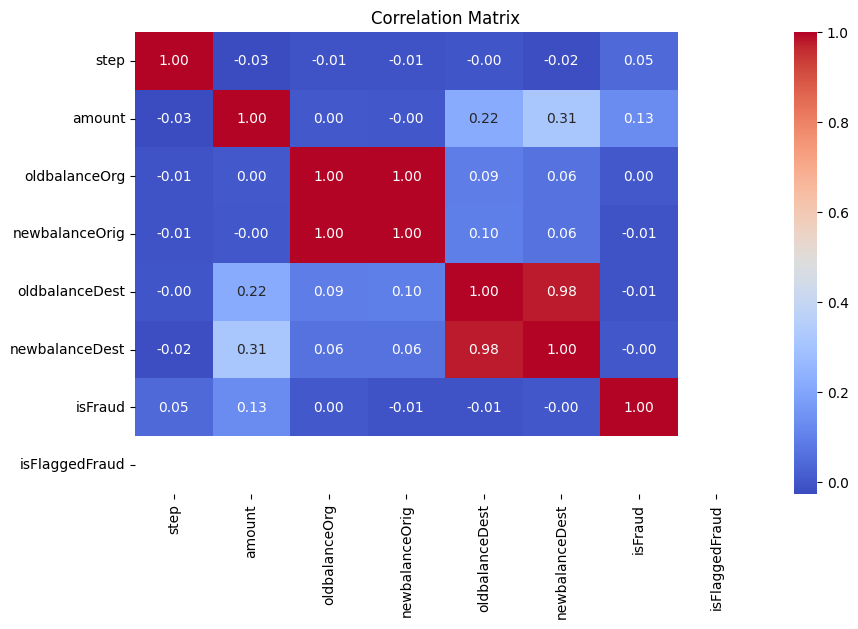

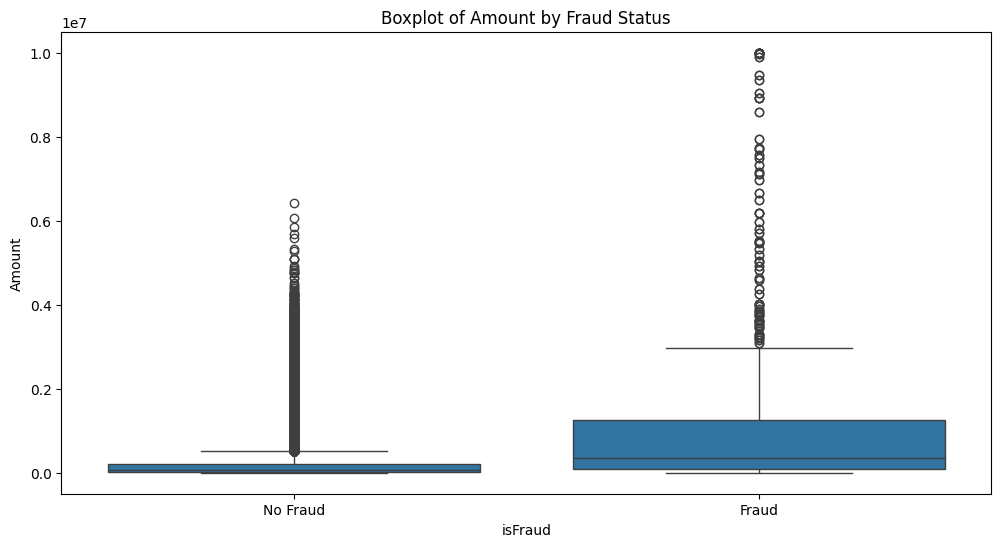

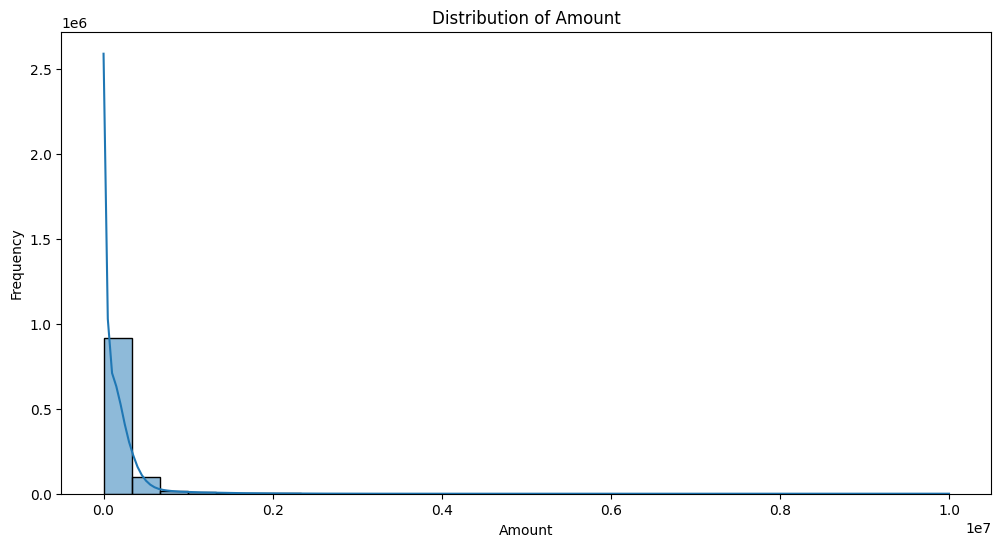

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cell 2: Load the Transformed Data
data = pd.read_csv('../data/processed/transformed_data.csv')

# Cell 3: Data Cleaning
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Check the first few rows of the dataframe
print(data.head())

# Check for unique values across all non-target columns
for column in data.columns:
    print(f"Unique values in '{column}':", data[column].unique())

# Convert 'amount' to numeric, forcing errors to NaN
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Check for missing values in the 'amount' after conversion
print("Missing values in 'amount' after conversion:\n", data['amount'].isnull().sum())

# Check overall missing values across the DataFrame
missing_values = data.isnull().sum()
print("Missing values across all columns:\n", missing_values[missing_values > 0])

# Handling Missing Values
if missing_values.any():  # Check if any missing values exist
    # Option 1: Drop rows with missing values
    data = data.dropna()
    
    # Option 2: Fill missing values with mean (or other statistic), if you prefer
    # data.fillna(data.mean(), inplace=True)  # For numeric columns

# Basic Summary Statistics after handling missing values
print("Summary Statistics after handling missing values:\n", data.describe())

# Cell 6: Visualizing Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraud Cases')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["No Fraud", "Fraud"])
plt.show()

# Cell 7: Visualizing Feature Correlations
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Cell 8: Visualizing Features Against the Target
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Boxplot of Amount by Fraud Status')
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=["No Fraud", "Fraud"])
plt.show()

# Cell 9: Additional Visualizations (e.g., histograms)
plt.figure(figsize=(12, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()